<a href="https://colab.research.google.com/github/luciekash/Recurrent-Neural-Networks-with-Python/blob/main/Recurrent_Neural_Networks_with_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#2F4F4F'>AfterWork Data Science: Recurrent Neural Networks with Python - Project</font>

## <font color='#2F4F4F'>Step 1. Business Understanding </font>

### a) Specifying the Research Question

Build a recurrent neural networks model that will be used to predict Tesla stock prices in 2017 using data from 2012-2016

### b) Defining the Metric for Success

Build a neural networks regression model with an RSME  less than 10% of the target mean.

### c) Understanding the Context 

Stockpy is an innovative fintech enabling financial prosperity for the entire population. It is a venture funded startup based in Palo Alto bringing world-class financial experiences to a continually growing customer base. As Stockpy enters an expansion phase for innovative fintech product offerings, it aims to enhance the enormous value in data processing and analysis for continuous growth and success.

As a Finance Data Scientist for Stockpy, you provide leadership to turn cutting-edge technology into actionable insights; unlocking the power of data that provides value to business decisions and customer service enhancements.

### d) Recording the Experimental Design

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings and Recommendation
* Challenging the Solution


## <font color='#2F4F4F'>Step 2. Data Importation</font>

In [ ]:
# Importing standard libraries
# ---
# 
import pandas as pd
import numpy as np

In [ ]:
# Importing our dataset
# ---
#
df_train = pd.read_csv('https://bit.ly/38dSbSb')
df_train


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,5.788000,5.900000,5.530000,5.616000,5.616000,4640500
1,2012-01-04,5.642000,5.734000,5.500000,5.542000,5.542000,3150500
2,2012-01-05,5.552000,5.586000,5.370000,5.424000,5.424000,5027500
3,2012-01-06,5.440000,5.558000,5.282000,5.382000,5.382000,4931500
4,2012-01-09,5.400000,5.498000,5.224000,5.450000,5.450000,4485000
...,...,...,...,...,...,...,...
1253,2016-12-23,41.599998,42.689999,41.542000,42.667999,42.667999,23352500
1254,2016-12-27,42.976002,44.450001,42.883999,43.905998,43.905998,29578500
1255,2016-12-28,44.306000,44.759998,43.439999,43.948002,43.948002,18912500
1256,2016-12-29,43.712002,43.840000,42.824001,42.936001,42.936001,20225000


## <font color='#2F4F4F'>Step 3. Data Exploration</font>

In [ ]:
# Sample dataset
# ---
#
df_train.sample(3)

,Date,Open,High,Low,Close,Adj Close,Volume
823,2015-04-14,41.714001,41.897999,41.099998,41.492001,41.492001,15130000
216,2012-11-12,6.058000,6.284000,6.032000,6.214000,6.214000,2779500
490,2013-12-13,29.610001,30.360001,29.464001,29.530001,29.530001,52959500


In [ ]:
# Statistical summary
# ---
#
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,31.997898,32.558671,31.403696,31.989245,31.989245,2.551310e+07
std,16.911515,17.148543,16.649245,16.903500,16.903500,2.259037e+07
min,5.324000,5.370000,4.528000,4.558000,4.558000,1.824500e+06
25%,8.403000,8.556000,8.197000,8.379500,8.379500,1.059400e+07
50%,39.411000,40.123998,38.709000,39.427000,39.427000,2.007650e+07
75%,45.214499,45.934999,44.303000,45.076502,45.076502,3.245150e+07
max,57.534000,58.284000,56.080002,57.208000,57.208000,1.858195e+08


## <font color='#2F4F4F'>Step 4. Data Preparation</font>

In [ ]:
# Getting our train dataset
# ---
#
train_set = df_train.iloc[:, 1:2].values
print(train_set)

[[ 5.788   ]
 [ 5.642   ]
 [ 5.552   ]
 ...
 [44.306   ]
 [43.712002]
 [43.259998]]


In [ ]:
# Performing Feature scaling
# ---
#
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(train_set)

In [ ]:
# Creating a dataset with 60 timesteps and 1 output
# ---
#
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled [i-60:i, 0])
    y_train.append(training_set_scaled [i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train, y_train

(array([[0.00888719, 0.00609079, 0.00436698, ..., 0.03436123, 0.04037541,
         0.04275043],
        [0.00609079, 0.00436698, 0.0022218 , ..., 0.04037541, 0.04275043,
         0.04432101],
        [0.00436698, 0.0022218 , 0.00145566, ..., 0.04275043, 0.04432101,
         0.04175445],
        ...,
        [0.71128134, 0.71434589, 0.71105156, ..., 0.69565219, 0.69480939,
         0.72116457],
        [0.71434589, 0.71105156, 0.67358745, ..., 0.69480939, 0.72116457,
         0.74663857],
        [0.71105156, 0.67358745, 0.66799466, ..., 0.72116457, 0.74663857,
         0.73526148]]),
 array([0.04432101, 0.04175445, 0.04102662, ..., 0.74663857, 0.73526148,
        0.72660406]))

In [ ]:
# Reshaping 
# ---
#
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

##  <font color='#2F4F4F'>Step 5. Data Modeling</font>

In [ ]:
# Building the RNN
# import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Initialising the RNN

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

# Adding the output layer

regressor.add(Dense(units = 1))

In [ ]:
# Compile the RNN 
# ---
#

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Fitting the RNN to the training set
# ---
#
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 18ms/step - loss: 0.0417
Epoch 2/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0091
Epoch 3/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0082
Epoch 4/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0091
Epoch 5/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0070
Epoch 6/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0065
Epoch 7/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0064
Epoch 8/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0062
Epoch 9/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0055
Epoch 10/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0053
Epoch 11/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0057
Epoch 12/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0061
Epoch 13/100
38/38 [====

In [ ]:
# Making predictions: Getting the predicted stock price for 2017
# ---
df_test=pd.read_csv("/content/TSLA.csv")
df_test.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2017,42.972000,44.066002,42.192001,43.397999,43.397999,29616500
1,1/4/2017,42.950001,45.599998,42.862000,45.397999,45.397999,56067500
2,1/5/2017,45.284000,45.495998,44.389999,45.349998,45.349998,29558500
3,1/6/2017,45.386002,46.062000,45.090000,45.801998,45.801998,27639500
4,1/9/2017,45.793999,46.383999,45.599998,46.256001,46.256001,19897500
5,1/10/2017,46.400002,46.400002,45.377998,45.973999,45.973999,18300000
6,1/11/2017,45.813999,45.995998,45.335999,45.945999,45.945999,18254000
7,1/12/2017,45.812000,46.139999,45.116001,45.917999,45.917999,18951000
8,1/13/2017,46.000000,47.570000,45.917999,47.549999,47.549999,30465000
9,1/17/2017,47.340000,47.992001,46.874001,47.116001,47.116001,23087500


In [ ]:
real_price = df_test.iloc[:, 1:2].values

# Getting the Predicted Stock Price of 2017

#
dataset = pd.concat((df_train['Open'],
                           df_test['Open']), axis=0)

#
inputs = dataset[len(dataset)-len(df_test)-60:].values

# Reshaping the inputs to have only 1 column
# ---
#
inputs = inputs.reshape(-1, 1)


# Using the scale set by the training set to scale the test inputs
# ---
#
inputs = sc.transform(inputs)

# Then creating the test data structure just as we did for the train dataset
# ---

X_test = []
y_test = []

for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(inputs[i, 0])

X_test, y_test  = np.array(X_test), np.array(y_test)  
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Making our Predictions
# ---
#
predicted_price = regressor.predict(X_test)


predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price)

[[43.22709 ]
 [42.845722]
 [42.575035]
 [43.428318]
 [44.413784]
 [45.076977]
 [45.55024 ]
 [45.470306]
 [45.250683]
 [45.20086 ]
 [45.84392 ]
 [46.413685]
 [47.62939 ]
 [48.223824]
 [48.302284]
 [48.60595 ]
 [49.562923]
 [49.857956]
 [49.51462 ]
 [49.35338 ]
 [49.045692]
 [49.27652 ]
 [49.084145]
 [49.229477]
 [49.294003]
 [49.99931 ]
 [50.359394]
 [51.30779 ]
 [52.185432]
 [52.54843 ]
 [53.488758]
 [54.045998]
 [53.87881 ]
 [52.410934]
 [52.77335 ]
 [53.956432]
 [52.714504]
 [50.669556]
 [49.22898 ]
 [48.372875]
 [49.102142]
 [49.42735 ]
 [49.425774]
 [48.970215]
 [48.962486]
 [48.56309 ]
 [48.305294]
 [48.09309 ]
 [47.879555]
 [47.9104  ]
 [49.073368]
 [50.483192]
 [51.22778 ]
 [50.953884]
 [50.864532]
 [49.771114]
 [49.533978]
 [49.77295 ]
 [50.55711 ]
 [52.836174]
 [54.139538]
 [54.182426]
 [53.986286]
 [54.851868]
 [56.63465 ]
 [57.984737]
 [57.515907]
 [57.251583]
 [58.80574 ]
 [60.089355]
 [59.315952]
 [57.684128]
 [58.034634]
 [58.1039  ]
 [58.527107]
 [59.181652]
 [58.65116 ]

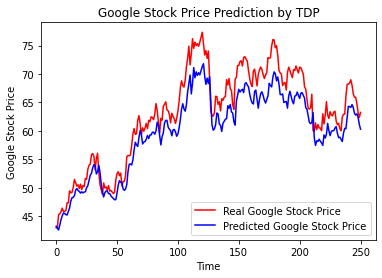

In [ ]:
# Visualizing the results
import matplotlib.pyplot as plt 

plt.plot(real_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_price, color='blue',
         label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction by TDP')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
# Model Evaluation
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_price, predicted_price))
print(rmse)
print(real_price.mean())

3.5904818032653467
62.859242980079685


## <font color='#2F4F4F'>Step 6. Summary of Findings and Recommendation</font>

Your observation goes here...

* The RMSE value obtained is 3.5 which less than 10% of the target mean (62.85). This means the model is of high performance


*  The visualization on real and predicted values shows a similar pattern, indicating a high model accuracy



## <font color='#2F4F4F'>Step 7. Challenging our Solution</font>

a) Did we have the right question?

Yes

b) Did we have the right data?

Yes, the data we had was sufficient in answering the research question

c) What can be done to improve the solution?


The model performance can be improved through:


*   Training with more data

*   Adding more LSTM layers

*  Increasing the timesteps

*  Adding some other indicators

*  Adding more neurons in the LSTM layers


